## Notebook Overview

This notebook simulates the random paths of multiple mosquitoes and analyzes the probability of finding them at a specific point at a random time. The goal is to compare this Monte Carlo simulation with the solution obtained using a partial differential equation (PDE) method implemented in a separate file. While the focus is not on the specific constants, the results highlight the general behavior and characteristics of the solution. The Monte Carlo approach, though less smooth and computationally more expensive, exhibits similar attributes to the PDE-based solution.

Let's import the packages we will use

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In this section, we define the constants required for our simulation. 

- **N**: The number of mosquitoes being simulated.
- **T**: The total number of steps each mosquito will take.
- **dr**: The step size for each movement.
- **θ (theta)**: The direction of movement at each step, represented as the cumulative sum of small angles. These angles are sampled from a normal distribution to simulate random flight paths.

In [3]:
dr = 0.005
N = 10000
T = 1000
k = 0.1*2*np.pi
theta_t = np.random.normal(loc = 0, scale = k, size = (N, T))
theta_t = np.cumsum(theta_t, axis = 1)

We now define the initial conditions for the simulation. The mosquitoes are initially placed uniformly at random along the boundary. From this starting point, they are allowed to move randomly over time, and we track their positions to analyze their behavior.


In [4]:
# Initialize r0 and theta0
r0 = 1

# Compute displacements
dx = np.cumsum(dr * np.cos(theta_t), axis=1)
dy = np.cumsum(dr * np.sin(theta_t), axis=1)

# Compute x_t and y_t using broadcasting
start_theta = 2*np.pi*np.random.random(N)
x_t = dx + r0 * np.cos(start_theta)[:, np.newaxis]
y_t = dy + r0 * np.sin(start_theta)[:, np.newaxis]

At this stage, we flatten the arrays as the individual identities of the mosquitoes are not important. Our focus is solely on identifying the regions where mosquitoes are present. 

In [5]:
x_t = x_t.flatten()
y_t = y_t.flatten()

To focus on the probability of finding a mosquito within the circle, we filter out all points that lie outside its boundary.

In [6]:
# Create a boolean mask for the condition x^2 + y^2 <= 1
mask = x_t**2 + y_t**2 <= 1

# Apply the mask to x_t and y_t
x_t = x_t[mask]
y_t = y_t[mask]

Next, we visualize the probability density distribution using a heatmap. This plot will also be saved for comparison with the PDE-based solution.

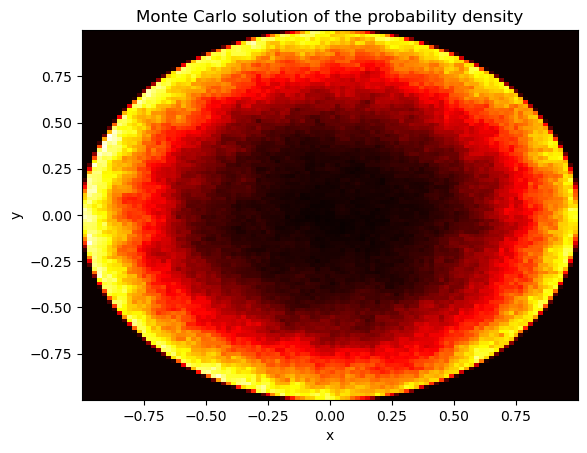

In [7]:
# Create a 2D histogram
heatmap, xedges, yedges = np.histogram2d(x_t, y_t, bins=100)

# Plot the heatmap
plt.imshow(heatmap.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', cmap='hot')

# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Monte Carlo solution of the probability density")
plt.savefig("Monte Carlo solution")
plt.show()

The visualization reveals that the probability density is lowest at the center of the circle. This makes it an ideal location to place our tent, as it minimizes the likelihood of encountering mosquitoes.